# Model Training

## 1.1 Import Data and Riquired Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [11]:
# Basic Import
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
# Modeling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings('ignore')

Import  Data as Pandas Dataframe

In [3]:
df = pd.read_csv("data/data.csv")

show 5 top rows

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [6]:
X = df.drop(columns=["math score"])
y = df["math score"]

In [8]:
num_features = X.select_dtypes(exclude= "object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [16]:
# Separate dataset into train an test
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an evalution function to give all metrics after training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print(" Model performance for Training set")
    print("- Root Mean Squared Error: {:.4}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4}".format(model_train_mae))
    print("- R2 Score: {:.4}".format(model_train_r2))

    print('------------------------------------')

    print(" Model performance for Test set")
    print("- Root Mean Squared Error: {:.4}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4}".format(model_test_mae))
    print("- R2 Score: {:.4}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
 Model performance for Training set
- Root Mean Squared Error: 5.324
- Mean Absolute Error: 4.267
- R2 Score: 0.8743
------------------------------------
 Model performance for Test set
- Root Mean Squared Error: 5.396
- Mean Absolute Error: 4.216
- R2 Score: 0.8803


Lasso
 Model performance for Training set
- Root Mean Squared Error: 6.594
- Mean Absolute Error: 5.206
- R2 Score: 0.8071
------------------------------------
 Model performance for Test set
- Root Mean Squared Error: 6.52
- Mean Absolute Error: 5.158
- R2 Score: 0.8253


Ridge
 Model performance for Training set
- Root Mean Squared Error: 5.323
- Mean Absolute Error: 4.265
- R2 Score: 0.8743
------------------------------------
 Model performance for Test set
- Root Mean Squared Error: 5.39
- Mean Absolute Error: 4.211
- R2 Score: 0.8806


K-Neighbors Regressor
 Model performance for Training set
- Root Mean Squared Error: 5.708
- Mean Absolute Error: 4.517
- R2 Score: 0.8555
--------------------------

## Results

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850407
8,AdaBoost Regressor,0.842650
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.719978


we want to use Linear Regression because ther isn't diference between Ridge

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100

print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

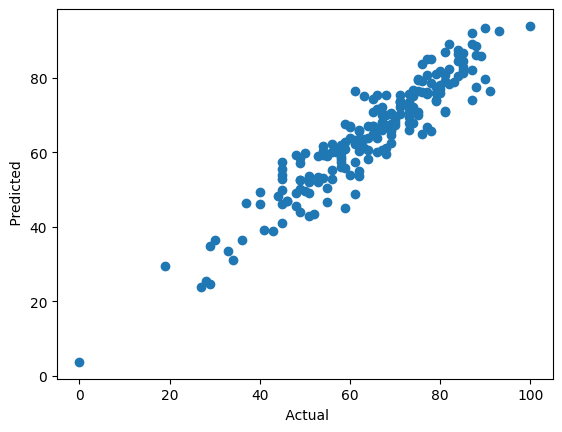

In [23]:
plt.scatter(y_test, y_pred);
plt.xlabel(" Actual")
plt.ylabel(" Predicted")
plt.show()

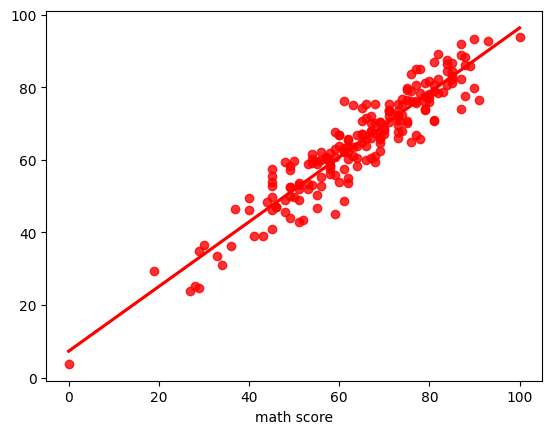

In [24]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")
plt.show()

### Difference between actual and predicted values

In [25]:
pred_df = pd.DataFrame({"Actual Values":y_test, "Predicted Values": y_pred, "Difference":y_test-y_pred})
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
